<img src='for_markdown/ensemble/1.png'>

<img src='for_markdown/ensemble/2.png'>

In [30]:
# 필요한 모듈 불러오기
%matplotlib inline

import time
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

sns.set()
sns.set_style('white') 
sns.set_color_codes(palette='pastel')

#plt.rcParams['axes.unicode_minus'] = False
#path = 'C:/Windows/Fonts/malgun.ttf'
#font_name = mpl.font_manager.FontProperties(fname=path, size=50).get_name()
#print(font_name)
#plt.rc('font', family=font_name)

In [43]:
root_dir = 'Z:/3. 개인백업/이민정/한화교육준비/Data/' #데이터가 있는 폴더 디렉토리
data = pd.read_excel(os.path.join(root_dir,'preprocessed_wdbc_data.xlsx'))

In [45]:
data.head()

ID Diagnosis  Radius  Texture  Perimeter    Area  Smoothness  \
0    842302         M   17.99    10.38     122.80  1001.0     0.11840   
1    842517         M   20.57    17.77     132.90  1326.0     0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3  84348301         M   11.42    20.38      77.58   386.1     0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0     0.10030   

   Compactness  Concavity  Concave points  Symmetry  Fractal dimension  
0      0.27760     0.3001         0.14710    0.2419            0.07871  
1      0.07864     0.0869         0.07017    0.1812            0.05667  
2      0.15990     0.1974         0.12790    0.2069            0.05999  
3      0.28390     0.2414         0.10520    0.2597            0.09744  
4      0.13280     0.1980         0.10430    0.1809            0.05883

In [46]:
data.columns

Index(['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area',
       'Smoothness', 'Compactness', 'Concavity', 'Concave points', 'Symmetry',
       'Fractal dimension'],
      dtype='object')

In [47]:
# id를 데이터 index로 만들기
data.set_index(['ID'], inplace = True)

In [48]:
# diagnosis의 'M':1, 'B':0으로 바꾸기
data['Diagnosis'] = data['Diagnosis'].map({'M':1,'B':0})

In [49]:
X = data.loc[:,data.columns != 'Diagnosis']
y = data.Diagnosis

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 2017020558)

In [113]:
rf_clf = RandomForestClassifier(random_state=2017020558)

In [114]:
np.random.seed(2017020558)
start = time.time()

param_dict = {'max_depth': [2,3,4,5],
             'max_features' : ['auto','sqrt','log2', None],
             'criterion': ['gini','entropy']}

cv_rf = GridSearchCV(rf_clf, cv=5,
                    param_grid=param_dict,
                    n_jobs = 3)

cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n',
     cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {:.2f}'.format(end-start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search: 3.30


In [116]:
rf_clf.set_params(criterion='entropy', max_depth=4, max_features=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [117]:
rf_clf.set_params(oob_score=True)

min_estimators = 5
max_estimators = 200

error_rate = {}
for i in range(min_estimators, max_estimators + 1):
    rf_clf.set_params(n_estimators=i)
    rf_clf.fit(X_train, y_train)
    
    oob_error = 1 - rf_clf.oob_score_
    error_rate[i] = oob_error

In [118]:
oob_series = pd.Series(error_rate)

Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

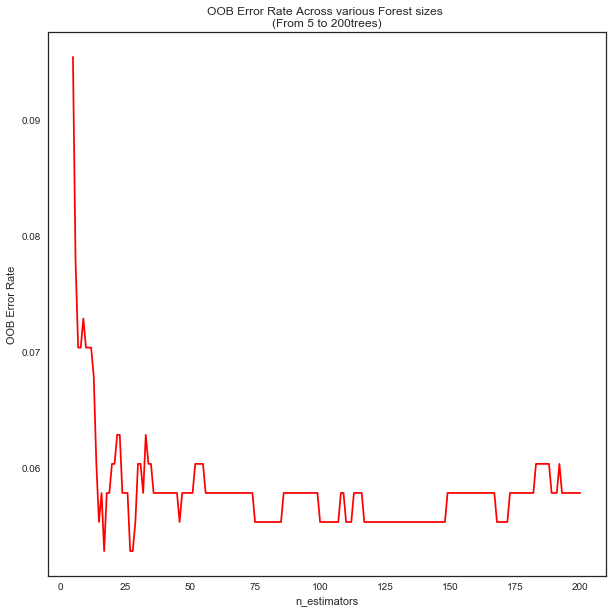

In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
oob_series.plot(kind='line',
                color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

In [120]:
print('OOB Error rate for 100 trees is: {0:.5f}'.format(oob_series[100]))

OOB Error rate for 100 trees is: 0.05528


In [121]:
rf_clf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [122]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [123]:
imp = rf_clf.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

        variables importance
7  Concave points   0.566812
3            Area    0.16268
1         Texture   0.139373
2       Perimeter  0.0673017
6       Concavity  0.0231538
0          Radius  0.0137978


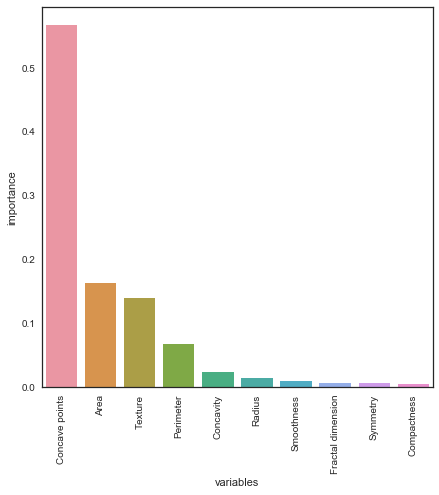

In [124]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

In [125]:
y_test_pred = rf_clf.predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.9298
- F1 score (Test) : 0.92


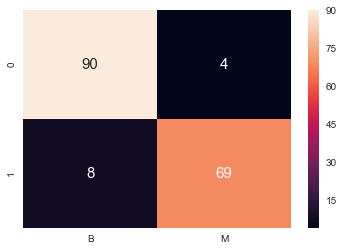

In [126]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 15})